<a href="https://colab.research.google.com/github/YuZinyakoff/NLP_labs/blob/main/Lab2_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
import pandas as pd

Соединим все три блока в train для удобства, потом рассплитим сами

In [ ]:
dataset = load_dataset("iluvvatar/NEREL")

train = pd.concat([pd.DataFrame(dataset['train']), pd.DataFrame(dataset['dev']), pd.DataFrame(dataset['test'])], ignore_index=True).reset_index(drop=True)


In [ ]:
train.columns

Index(['id', 'text', 'entities', 'relations', 'links'], dtype='object')

In [ ]:
train = train[['text', 'entities']]

Сори, ноутбук не оч хорошо организован и не почищен

# Описание датасета

[Источник](https://huggingface.co/datasets/iluvvatar/NEREL)
```python
@article{loukachevitch2021nerel,
title={NEREL: A Russian Dataset with Nested Named Entities, Relations and Events},
author={Loukachevitch, Natalia and Artemova, Ekaterina and Batura, Tatiana and Braslavski, Pavel and Denisov, Ilia and Ivanov, Vladimir and Manandhar, Suresh and Pugachev, Alexander and Tutubalina, Elena},
journal={arXiv preprint arXiv:2108.13112},
year={2021}
}
```

Русскоязычный датасет новостных текстов. Для нашей задачи нужны будут только 2 его столбца: сами тексты и соответственно сущности. В следующих двух ячейках показан формат данных.

Содержит 29 типов сущностей (ent_types.jsonl в репозитории):
```
{"type": "AGE", "link": ""}
{"type": "AWARD", "link": "<NORM>:Wikidata"}
{"type": "CITY", "link": "<NORM>:Wikidata"}
{"type": "COUNTRY", "link": "<NORM>:Wikidata"}
{"type": "CRIME", "link": ""}
{"type": "DATE", "link": ""}
{"type": "DISEASE", "link": "<NORM>:Wikidata"}
{"type": "DISTRICT", "link": "<NORM>:Wikidata"}
{"type": "EVENT", "link": "<NORM>:Wikidata"}
{"type": "FACILITY", "link": "<NORM>:Wikidata"}
{"type": "FAMILY", "link": ""}
{"type": "IDEOLOGY", "link": "<NORM>:Wikidata"}
{"type": "LANGUAGE", "link": "<NORM>:Wikidata"}
{"type": "LAW", "link": "<NORM>:Wikidata"}
{"type": "LOCATION", "link": "<NORM>:Wikidata"}
{"type": "MONEY", "link": ""}
{"type": "NATIONALITY", "link": "<NORM>:Wikidata"}
{"type": "NUMBER", "link": ""}
{"type": "ORDINAL", "link": ""}
{"type": "ORGANIZATION", "link": "<NORM>:Wikidata"}
{"type": "PENALTY", "link": ""}
{"type": "PERCENT", "link": ""}
{"type": "PERSON", "link": "<NORM>:Wikidata"}
{"type": "PRODUCT", "link": "<NORM>:Wikidata"}
{"type": "PROFESSION", "link": "<NORM>:Wikidata"}
{"type": "RELIGION", "link": "<NORM>:Wikidata"}
{"type": "STATE_OR_PROVINCE", "link": "<NORM>:Wikidata"}
{"type": "TIME", "link": ""}
{"type": "WORK_OF_ART", "link": "<NORM>:Wikidata"}
```

In [ ]:
train.iloc[0].text

'Пулеметы, автоматы и снайперские винтовки изъяты в арендуемом американцами доме в Бишкеке\n\n05/08/2008 10:35\n\nБИШКЕК, 5 августа /Новости-Грузия/. Правоохранительные органы Киргизии обнаружили в доме, арендуемом гражданами США в Бишкеке, пулеметы, автоматы и снайперские винтовки, сообщает во вторник пресс-служба МВД Киргизии.\n\n"В ходе проведения оперативно-профилактического мероприятия под кодовым названием "Арсенал" в новостройке Ынтымак, в доме, принадлежащем 66-летнему гражданину Киргизии и арендуемом гражданами США, обнаружены и изъяты: шесть крупнокалиберных пулеметов с оптическим прицелом и с приборами ночного видения, 26 автоматов калибра 5,56 миллиметра, два винчестера марки МОСВЕГА 12-го калибра, четыре ствола от крупнокалиберного пулемета, два подствольных гранатомета, четыре снайперские винтовки с оптическим прицелом защитного цвета, шесть пистолетов калибра 9 миллиметров марки Беретта, одна винтовка", - говорится в сообщении МВД.\n\nПресс-служба отмечает, что на момент

In [ ]:
train.iloc[0].entities

['T1\tNATIONALITY 62 74\tамериканцами',
 'T2\tCITY 82 89\tБишкеке',
 'T3\tDATE 117 126\t5 августа',
 'T4\tCOUNTRY 136 142\tГрузия',
 'T5\tORGANIZATION 145 179\tПравоохранительные органы Киргизии',
 'T6\tCOUNTRY 171 179\tКиргизии',
 'T7\tCOUNTRY 221 224\tСША',
 'T8\tCITY 227 234\tБишкеке',
 'T9\tDATE 288 298\tво вторник',
 'T10\tORGANIZATION 312 315\tМВД',
 'T11\tDATE 91 101\t05/08/2008',
 'T12\tCITY 433 440\tЫнтымак',
 'T13\tAGE 464 474\t66-летнему',
 'T14\tCOUNTRY 486 494\tКиргизии',
 'T15\tCOUNTRY 519 522\tСША',
 'T16\tNUMBER 545 550\tшесть',
 'T17\tNUMBER 631 633\t26',
 'T18\tNUMBER 652 667\t5,56 миллиметра',
 'T19\tNUMBER 669 672\tдва',
 'T20\tPRODUCT 690 697\tМОСВЕГА',
 'T21\tNUMBER 713 719\tчетыре',
 'T22\tNUMBER 758 761\tдва',
 'T23\tNUMBER 788 794\tчетыре',
 'T24\tNUMBER 855 860\tшесть',
 'T25\tNUMBER 880 893\t9 миллиметров',
 'T26\tPRODUCT 900 907\tБеретта',
 'T27\tNUMBER 909 913\tодна',
 'T28\tORGANIZATION 949 952\tМВД',
 'T29\tNUMBER 1098 1100\t10',
 'T30\tCOUNTRY 1136 1139\

Нужно распарсить тип сущности, номер начального и конечного символов, саму сущность.

In [ ]:
import re

def parse_entities(entities_list):
    parsed = []
    for ent in entities_list:
        parts = ent.split('\t')
        if len(parts) == 3:
            ent_id, ent_info, ent_text = parts
            # Разделение типа сущности и позиций
            match = re.match(r'(\w+) (\d+) (\d+)', ent_info)
            if match:
                ent_type, start, end = match.groups()
                parsed.append({
                    'entity_id': ent_id,
                    'entity_type': ent_type,
                    'start_pos': int(start),
                    'end_pos': int(end),
                    'entity_text': ent_text
                })
    return parsed

# Применение функции к DataFrame
train['parsed_entities'] = train['entities'].apply(parse_entities)


In [ ]:
train

,text,entities,parsed_entities
0,"Пулеметы, автоматы и снайперские винтовки изъя...","[T1\tNATIONALITY 62 74\tамериканцами, T2\tCITY...","[{'entity_id': 'T1', 'entity_type': 'NATIONALI..."
1,Муртаза Рахимов чистит кадры\n\t\nПрезидент Ба...,"[T1\tPERSON 0 15\tМуртаза Рахимов, T2\tPROFESS...","[{'entity_id': 'T1', 'entity_type': 'PERSON', ..."
2,Россия задерживает поставку генсека\n\t\nСегод...,"[T1\tCOUNTRY 0 6\tРоссия, T2\tCITY 48 52\tДохе...","[{'entity_id': 'T1', 'entity_type': 'COUNTRY',..."
3,"Российские менеджеры отказались возглавлять ""г...","[T1\tCOUNTRY 0 10\tРоссийские, T2\tORGANIZATIO...","[{'entity_id': 'T1', 'entity_type': 'COUNTRY',..."
4,Facebook нашел нового финансового директора\nФ...,"[T1\tORGANIZATION 0 8\tFacebook, T2\tPROFESSIO...","[{'entity_id': 'T1', 'entity_type': 'ORGANIZAT..."
...,...,...,...
928,Замминистра здравоохранения Великобритании зар...,"[T1\tPERSON 371 384\tБорис Джонсон, T2\tPERSON...","[{'entity_id': 'T1', 'entity_type': 'PERSON', ..."
929,Умер создатель индастриала Дженезис Пи-Орридж\...,"[T1\tEVENT 96 100\tумер, T2\tPERSON 27 45\tДже...","[{'entity_id': 'T1', 'entity_type': 'EVENT', '..."
930,Билл Гейтс покинул совет директоров Microsoft\...,"[T1\tPERSON 0 10\tБилл Гейтс, T2\tORGANIZATION...","[{'entity_id': 'T1', 'entity_type': 'PERSON', ..."
931,Скончался Кузя УО\n\nВ Санкт-Петербурге в возр...,"[T1\tPERSON 10 17\tКузя УО, T2\tCITY 21 37\tСа...","[{'entity_id': 'T1', 'entity_type': 'PERSON', ..."


In [ ]:
train_exploded = train.explode('parsed_entities').reset_index(drop = True)
train_exploded

,text,entities,parsed_entities
0,"Пулеметы, автоматы и снайперские винтовки изъя...","[T1\tNATIONALITY 62 74\tамериканцами, T2\tCITY...","{'entity_id': 'T1', 'entity_type': 'NATIONALIT..."
1,"Пулеметы, автоматы и снайперские винтовки изъя...","[T1\tNATIONALITY 62 74\tамериканцами, T2\tCITY...","{'entity_id': 'T2', 'entity_type': 'CITY', 'st..."
2,"Пулеметы, автоматы и снайперские винтовки изъя...","[T1\tNATIONALITY 62 74\tамериканцами, T2\tCITY...","{'entity_id': 'T3', 'entity_type': 'DATE', 'st..."
3,"Пулеметы, автоматы и снайперские винтовки изъя...","[T1\tNATIONALITY 62 74\tамериканцами, T2\tCITY...","{'entity_id': 'T4', 'entity_type': 'COUNTRY', ..."
4,"Пулеметы, автоматы и снайперские винтовки изъя...","[T1\tNATIONALITY 62 74\tамериканцами, T2\tCITY...","{'entity_id': 'T5', 'entity_type': 'ORGANIZATI..."
...,...,...,...
56250,Умер Эдуард Лимонов\nЭдуард Лимонов\nВо вторни...,"[T2\tDATE 35 65\tВо вторник, 17 марта 2020 год...","{'entity_id': 'T53', 'entity_type': 'PERSON', ..."
56251,Умер Эдуард Лимонов\nЭдуард Лимонов\nВо вторни...,"[T2\tDATE 35 65\tВо вторник, 17 марта 2020 год...","{'entity_id': 'T54', 'entity_type': 'PERSON', ..."
56252,Умер Эдуард Лимонов\nЭдуард Лимонов\nВо вторни...,"[T2\tDATE 35 65\tВо вторник, 17 марта 2020 год...","{'entity_id': 'T55', 'entity_type': 'LOCATION'..."
56253,Умер Эдуард Лимонов\nЭдуард Лимонов\nВо вторни...,"[T2\tDATE 35 65\tВо вторник, 17 марта 2020 год...","{'entity_id': 'T56', 'entity_type': 'WORK_OF_A..."


In [ ]:
train_exploded['entity_type'] = train_exploded['parsed_entities'].apply(lambda x: x['entity_type'] if isinstance(x, dict) else None)
train_exploded['start_pos'] = train_exploded['parsed_entities'].apply(lambda x: x['start_pos'] if isinstance(x, dict) else None)
train_exploded['end_pos'] = train_exploded['parsed_entities'].apply(lambda x: x['end_pos'] if isinstance(x, dict) else None)
train_exploded['entity_text'] = train_exploded['parsed_entities'].apply(lambda x: x['entity_text'] if isinstance(x, dict) else None)

train_exploded.drop(columns=['parsed_entities', 'entities'], inplace=True)
train_exploded

,text,entity_type,start_pos,end_pos,entity_text
0,"Пулеметы, автоматы и снайперские винтовки изъя...",NATIONALITY,62,74,американцами
1,"Пулеметы, автоматы и снайперские винтовки изъя...",CITY,82,89,Бишкеке
2,"Пулеметы, автоматы и снайперские винтовки изъя...",DATE,117,126,5 августа
3,"Пулеметы, автоматы и снайперские винтовки изъя...",COUNTRY,136,142,Грузия
4,"Пулеметы, автоматы и снайперские винтовки изъя...",ORGANIZATION,145,179,Правоохранительные органы Киргизии
...,...,...,...,...,...
56250,Умер Эдуард Лимонов\nЭдуард Лимонов\nВо вторни...,PERSON,901,909,Молотова
56251,Умер Эдуард Лимонов\nЭдуард Лимонов\nВо вторни...,PERSON,910,921,Риббентропа
56252,Умер Эдуард Лимонов\nЭдуард Лимонов\nВо вторни...,LOCATION,958,964,восток
56253,Умер Эдуард Лимонов\nЭдуард Лимонов\nВо вторни...,WORK_OF_ART,1103,1122,Старик путешествует


# EDA

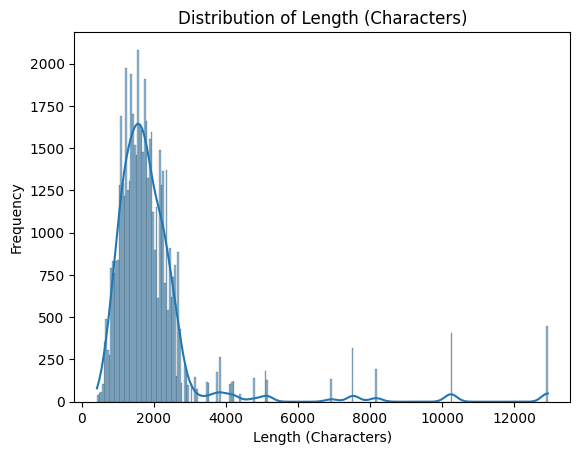

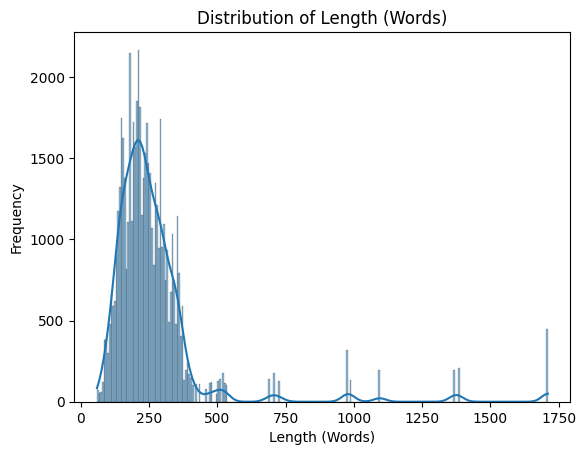

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

train_exploded['length'] = train_exploded['text'].apply(len)
train_exploded['length'] = train_exploded['length'].astype(float)

train_exploded['word_count'] = train_exploded['text'].apply(lambda x: len(x.replace('\n', ' ').split()))
train_exploded['word_count'] = train_exploded['word_count'].astype(float)

sns.histplot(data=train_exploded, x='length', kde=True)
plt.title('Distribution of Length (Characters)')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=train_exploded, x='word_count', kde=True)
plt.title('Distribution of Length (Words)')
plt.xlabel('Length (Words)')
plt.ylabel('Frequency')
plt.show()

Довольно длинный хвост по длинам текстов. В среднем около 2 тысяч символов. По словам в среднем в районе 250, По идее в NN подходе мы должны будем привести тексты к одной длине, если будем его использовать




In [ ]:
# Ещё раз посмотрим через describe
train_exploded[['length', 'word_count']].describe()

,length,word_count
count,56255.000000,56255.000000
mean,1973.704755,269.191112
std,1522.380157,202.688978
min,426.000000,60.000000
25%,1292.000000,178.000000
50%,1696.000000,231.000000
75%,2186.000000,297.000000
max,12932.000000,1710.000000


In [ ]:
# Получается примерно 206к токенов
train_exploded.groupby('text').agg({'length': 'max', 'word_count': 'max'}).word_count.sum()

206606.0

In [ ]:
train_exploded.describe(include='object')

,text,entity_type,entity_text
count,56255,56255,56255
unique,933,29,29495
top,Политический кризис в Чехии: движение в сторон...,PERSON,России
freq,450,9687,446


Чаще всего в текстах встречаются люди. Самая частая сущность "России" - конкретно в такой форме, поскольку в исходном датасете сущности не лемматизированы.

In [ ]:
train_exploded['entity_type'].value_counts()

,count
entity_type,
PERSON,9687
PROFESSION,8758
ORGANIZATION,7067
EVENT,6152
DATE,4936
COUNTRY,4444
CITY,2293
NUMBER,1912
AGE,1193


В целом вот так распределены у нас сущности. В топе - люди, профессии, организации, события и даты. Реже всего встречаются районы, религии, проценты, языки и видимо что-то про семью, посмотрим на примерах

In [ ]:
train_exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56255 entries, 0 to 56254
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         56255 non-null  object 
 1   entity_type  56255 non-null  object 
 2   start_pos    56255 non-null  int64  
 3   end_pos      56255 non-null  int64  
 4   entity_text  56255 non-null  object 
 5   length       56255 non-null  float64
 6   word_count   56255 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


Интересно посмотреть на самые частые сущности по категориям

In [ ]:
def get_top_entities(df, entity_type, top_n=5):
    return df[df['entity_type'] == entity_type]['entity_text'].value_counts().head(top_n).index.tolist()

unique_entity_types = train_exploded['entity_type'].value_counts().index

results = []

for ent_type in unique_entity_types:
    top_entities = get_top_entities(train_exploded, ent_type, top_n=5)
    results.append({
        'Тип сущности': ent_type,
        'Топ-1': top_entities[0],
        'Топ-2': top_entities[1],
        'Топ-3': top_entities[2],
        'Топ-4': top_entities[3],
        'Топ-5': top_entities[4],
    })

top_entities_df = pd.DataFrame(results)

from IPython.display import display, HTML

def highlight_none(val):
    return 'background-color: #f2f2f2' if val is None else ''

styled_df = top_entities_df.style.applymap(highlight_none, subset=['Топ-1', 'Топ-2', 'Топ-3', 'Топ-4', 'Топ-5'])

display(styled_df)


<ipython-input-21-5a16c67a6da8>:26: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = top_entities_df.style.applymap(highlight_none, subset=['Топ-1', 'Топ-2', 'Топ-3', 'Топ-4', 'Топ-5'])


,Тип сущности,Топ-1,Топ-2,Топ-3,Топ-4,Топ-5
0,PERSON,Владимир Путин,Путин,Барак Обама,Обама,Дмитрий Медведев
1,PROFESSION,президента,президент,Президент,президентом,премьер-министра
2,ORGANIZATION,правительство,правительства,ИГ,полиции,МВД
3,EVENT,скончался,умер,родился,выборах,отставку
4,DATE,в понедельник,в 2009 году,во вторник,Сегодня,в 2004 году
5,COUNTRY,России,США,РФ,Украины,Великобритании
6,CITY,Москве,Москвы,Нью-Йорке,Лондоне,московского
7,NUMBER,двух,два,один,три,двое
8,AGE,40-летний,54-летний,31-летний,50 лет,26-летний
9,ORDINAL,первый,второй,первым,первого,II


Посмотрим на количество сущностей в текстах

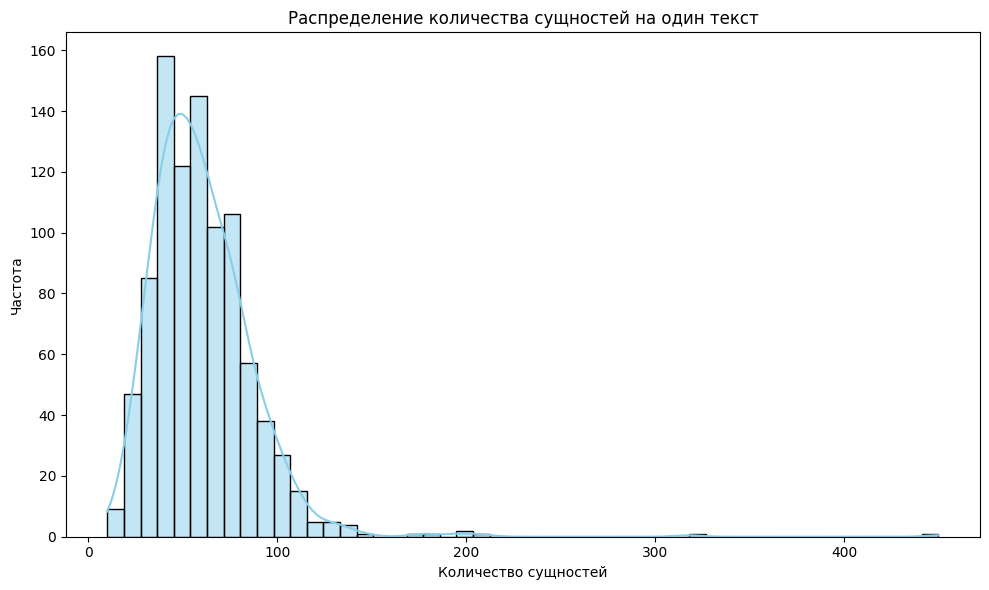

Статистика количества сущностей на текст:
count    933.000000
mean      60.294748
std       29.167894
min       10.000000
25%       42.000000
50%       56.000000
75%       74.000000
max      450.000000
dtype: float64


In [ ]:
entities_per_text = train_exploded.groupby('text').size()

plt.figure(figsize=(10, 6))
sns.histplot(entities_per_text, bins=50, kde=True, color='skyblue')
plt.title('Распределение количества сущностей на один текст')
plt.xlabel('Количество сущностей')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# Вывод основных статистик
print("Статистика количества сущностей на текст:")
print(entities_per_text.describe())

В среднем по 60 сущностей в текстах. Максимум - 450, однако более 100 сущностей в одном тексте встречается редко

In [ ]:
def has_overlapping_entities(df):
    df_sorted = df.sort_values(by='start_pos')

    previous_end = 0
    has_overlap = False
    overlap_count = 0

    for _, row in df_sorted.iterrows():
        current_start = row['start_pos']
        current_end = row['end_pos']

        if current_start < previous_end:
            has_overlap = True
            overlap_count += 1
            previous_end = max(previous_end, current_end)
        else:
            previous_end = current_end

    return pd.Series({'has_overlap': has_overlap, 'overlap_count': overlap_count})

overlap_results = train_exploded.groupby('text').apply(has_overlapping_entities)

texts_with_overlaps = overlap_results['has_overlap'].sum()

total_overlaps = overlap_results['overlap_count'].sum()

print(f"Количество текстов с пересекающимися сущностями: {texts_with_overlaps}")
print(f"Общее количество пересечений сущностей: {total_overlaps}")

Количество текстов с пересекающимися сущностями: 914
Общее количество пересечений сущностей: 11833


<ipython-input-23-07560c58be3c>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  overlap_results = train_exploded.groupby('text').apply(has_overlapping_entities)


Получается что примерно 20% сущностей у нас с пересечениями. Черт его знает, что делать в такой ситуации. Вроде есть модели, поддерживающие пересечения, но базово правила не должны конфликтовать друг с другом (если rule-based), а значит каждый токен может принадлежать только одной какой-то сущности.

In [ ]:
def choose_by_entity_type_frequency(df):

    type_freq = df['entity_type'].value_counts().to_dict()

    df_sorted = df.sort_values(
        by=['text', 'start_pos', 'entity_type'],
        ascending=[True, True, True]
    ).reset_index(drop=True)

    non_overlapping = []
    occupied_by_text = {}

    for _, row in df_sorted.iterrows():
        text = row['text']
        start, end = row['start_pos'], row['end_pos']
        overlap = False

        if text not in occupied_by_text:
            occupied_by_text[text] = set()

        for existing_start, existing_end in occupied_by_text[text]:
            if not (end <= existing_start or start >= existing_end):
                overlap = True
                break

        if not overlap:
            non_overlapping.append(row)
            occupied_by_text[text].add((start, end))

    return pd.DataFrame(non_overlapping)

train_without_overlaps = choose_by_entity_type_frequency(train_exploded)

In [ ]:
train_without_overlaps

,text,entity_type,start_pos,end_pos,entity_text,length,word_count
0,\n\nПалестинские СМИ прокомментировали отставк...,COUNTRY,2,14,Палестинские,1252.0,158.0
1,\n\nПалестинские СМИ прокомментировали отставк...,EVENT,37,45,отставку,1252.0,158.0
2,\n\nПалестинские СМИ прокомментировали отставк...,PROFESSION,46,70,министра обороны Израиля,1252.0,158.0
5,\n\nПалестинские СМИ прокомментировали отставк...,PERSON,71,83,Эхуда Барака,1252.0,158.0
6,\n\nПалестинские СМИ прокомментировали отставк...,ORGANIZATION,190,195,Хамас,1252.0,158.0
...,...,...,...,...,...,...,...
56250,Ярослав Песков: очередной заплыв не за горами\...,LOCATION,785,791,Енисея,872.0,122.0
56251,Ярослав Песков: очередной заплыв не за горами\...,PERSON,800,806,Песков,872.0,122.0
56252,Ярослав Песков: очередной заплыв не за горами\...,LOCATION,848,852,Неву,872.0,122.0
56253,Ярослав Песков: очередной заплыв не за горами\...,LOCATION,854,860,Днестр,872.0,122.0


In [ ]:
overlap_results = train_without_overlaps.groupby('text').apply(has_overlapping_entities)

texts_with_overlaps = overlap_results['has_overlap'].sum()

total_overlaps = overlap_results['overlap_count'].sum()

print(f"Количество текстов с пересекающимися сущностями: {texts_with_overlaps}")
print(f"Общее количество пересечений сущностей: {total_overlaps}")

Количество текстов с пересекающимися сущностями: 0
Общее количество пересечений сущностей: 0


<ipython-input-26-35fd5e129700>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  overlap_results = train_without_overlaps.groupby('text').apply(has_overlapping_entities)


Получается избавились от пересечений ценой уменьшения датасета на ~10к строк. Что ж, продолжим

Ещё раз глянем на примеры сущностей по классам и небольшие кусочки контекста в которых они встречаются

In [ ]:
from IPython.display import display, HTML
import random

def display_entity_examples(df, entity_types, examples_per_type=3, context_chars=30):
    """
    Отображает примеры для каждой категории сущностей с выделенными сущностями.

    :param df: DataFrame с данными
    :param entity_types: Список типов сущностей
    :param examples_per_type: Количество примеров для каждой категории
    :param context_chars: Количество символов контекста слева и справа от сущности
    """
    for ent_type in entity_types:
        subset = df[df['entity_type'] == ent_type]
        if subset.empty:
            continue
        samples = subset.sample(n=examples_per_type, random_state=42)
        print(f"### Тип сущности: {ent_type}\n")
        for idx, row in samples.iterrows():
            text = row['text']
            start = row['start_pos']
            end = row['end_pos']
            entity = row['entity_text']

            start_context = max(start - context_chars, 0)
            end_context = min(end + context_chars, len(text))

            context = text[start_context:start] + f"<span style='background-color: #FFFF00'>{entity}</span>" + text[end:end_context]

            context = context.replace('&', '&amp;').replace('<', '&lt;').replace('>', '&gt;')

            context = context.replace(f"&lt;span style='background-color: #FFFF00'&gt;{entity}&lt;/span&gt;",
                                      f"<span style='background-color: #FFFF00'>{entity}</span>")

            display(HTML(f"<p>...{context}...</p>"))
        print('-'*80)
        print("\n")


In [ ]:
unique_entity_types = train_without_overlaps['entity_type'].unique()
print(f"Всего типов сущностей: {len(unique_entity_types)}")
print(unique_entity_types)


Всего типов сущностей: 29
['COUNTRY' 'EVENT' 'PROFESSION' 'PERSON' 'ORGANIZATION' 'IDEOLOGY'
 'DISTRICT' 'AGE' 'DATE' 'NUMBER' 'STATE_OR_PROVINCE' 'NATIONALITY' 'LAW'
 'TIME' 'PENALTY' 'CRIME' 'MONEY' 'FACILITY' 'CITY' 'WORK_OF_ART'
 'PRODUCT' 'ORDINAL' 'AWARD' 'LOCATION' 'DISEASE' 'LANGUAGE' 'PERCENT'
 'RELIGION' 'FAMILY']


In [ ]:

examples_per_type = 3

context_chars = 30

display_entity_examples(train_without_overlaps, unique_entity_types, examples_per_type, context_chars)


### Тип сущности: COUNTRY



--------------------------------------------------------------------------------


### Тип сущности: EVENT



--------------------------------------------------------------------------------


### Тип сущности: PROFESSION



--------------------------------------------------------------------------------


### Тип сущности: PERSON



--------------------------------------------------------------------------------


### Тип сущности: ORGANIZATION



--------------------------------------------------------------------------------


### Тип сущности: IDEOLOGY



--------------------------------------------------------------------------------


### Тип сущности: DISTRICT



--------------------------------------------------------------------------------


### Тип сущности: AGE



--------------------------------------------------------------------------------


### Тип сущности: DATE



--------------------------------------------------------------------------------


### Тип сущности: NUMBER



--------------------------------------------------------------------------------


### Тип сущности: STATE_OR_PROVINCE



--------------------------------------------------------------------------------


### Тип сущности: NATIONALITY



--------------------------------------------------------------------------------


### Тип сущности: LAW



--------------------------------------------------------------------------------


### Тип сущности: TIME



--------------------------------------------------------------------------------


### Тип сущности: PENALTY



--------------------------------------------------------------------------------


### Тип сущности: CRIME



--------------------------------------------------------------------------------


### Тип сущности: MONEY



--------------------------------------------------------------------------------


### Тип сущности: FACILITY



--------------------------------------------------------------------------------


### Тип сущности: CITY



--------------------------------------------------------------------------------


### Тип сущности: WORK_OF_ART



--------------------------------------------------------------------------------


### Тип сущности: PRODUCT



--------------------------------------------------------------------------------


### Тип сущности: ORDINAL



--------------------------------------------------------------------------------


### Тип сущности: AWARD



--------------------------------------------------------------------------------


### Тип сущности: LOCATION



--------------------------------------------------------------------------------


### Тип сущности: DISEASE



--------------------------------------------------------------------------------


### Тип сущности: LANGUAGE



--------------------------------------------------------------------------------


### Тип сущности: PERCENT



--------------------------------------------------------------------------------


### Тип сущности: RELIGION



--------------------------------------------------------------------------------


### Тип сущности: FAMILY



--------------------------------------------------------------------------------




Видно что данные размечены качественно и скорее всего вручную (первый датасет, который взял, пришлось отбросить из-за большого количества ошибок в их разметке - их выучивать смысла нет). Ну и, кроме того, категорий много и они достаточно сложные.

In [ ]:
train_without_overlaps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46054 entries, 0 to 56254
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         46054 non-null  object 
 1   entity_type  46054 non-null  object 
 2   start_pos    46054 non-null  int64  
 3   end_pos      46054 non-null  int64  
 4   entity_text  46054 non-null  object 
 5   length       46054 non-null  float64
 6   word_count   46054 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.8+ MB


# Rule Based Approach

In [ ]:
!pip install natasha tqdm

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 74.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=8b89e96a4f41e8df2efd65a5054b4caf2551bb199b66ce6c33ecaff25d69b4b0
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=5b440208b0f6dd64a1a37a72e969a9661c516d208874b00c6156e957031fccbb
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built docopt intervaltree


In [ ]:
from natasha import (
    Segmenter,
    NewsEmbedding,
    NewsNERTagger,
    Doc
)
from tqdm import tqdm

segmenter = Segmenter()
embedding = NewsEmbedding()
ner_tagger = NewsNERTagger(embedding)


In [ ]:

unique_texts = train_without_overlaps['text'].unique()

results = {}
for txt in tqdm(unique_texts, desc="Processing unique texts"):
    doc = Doc(txt)
    doc.segment(segmenter)
    doc.tag_ner(ner_tagger)

    entities = []
    entity_types = []
    start_positions = []
    end_positions = []
    entity_texts = []

    for span in doc.spans:
        span.normalize(embedding.vocab)
        entities.append(span.type)
        entity_types.append(span.type)
        start_positions.append(span.start)
        end_positions.append(span.stop)
        entity_texts.append(span.text)

    results[txt] = {
        'natasha_entity_types': entities,
        'natasha_entities': entity_texts,
        'start_pos': start_positions,
        'end_pos': end_positions
    }

res_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
res_df.rename(columns={'index': 'text'}, inplace=True)

Processing unique texts: 100%|██████████| 933/933 [01:00<00:00, 15.45it/s]


In [ ]:
res_exploded = res_df.explode(['natasha_entity_types', 'natasha_entities', 'start_pos', 'end_pos'])

res_exploded['length'] = res_exploded['text'].apply(len)

res_exploded.rename(columns={
    'natasha_entity_types': 'entity_type',
    'natasha_entities': 'entity_text'
}, inplace=True)

res_exploded = res_exploded[['text', 'entity_type', 'start_pos', 'end_pos', 'entity_text', 'length']].reset_index(drop=True)


In [ ]:
res_exploded

,text,entity_type,start_pos,end_pos,entity_text,length
0,\n\nПалестинские СМИ прокомментировали отставк...,ORG,15,18,СМИ,1252
1,\n\nПалестинские СМИ прокомментировали отставк...,LOC,63,70,Израиля,1252
2,\n\nПалестинские СМИ прокомментировали отставк...,PER,71,83,Эхуда Барака,1252
3,\n\nПалестинские СМИ прокомментировали отставк...,ORG,190,195,Хамас,1252
4,\n\nПалестинские СМИ прокомментировали отставк...,ORG,204,214,Минобороны,1252
...,...,...,...,...,...,...
20554,Ярослав Песков: очередной заплыв не за горами\...,LOC,785,791,Енисея,872
20555,Ярослав Песков: очередной заплыв не за горами\...,PER,792,806,Ярослав Песков,872
20556,Ярослав Песков: очередной заплыв не за горами\...,PER,848,852,Неву,872
20557,Ярослав Песков: очередной заплыв не за горами\...,LOC,854,860,Днестр,872


In [ ]:
print(res_exploded.shape)
res_exploded['entity_type'].value_counts()

(20559, 6)


,count
entity_type,
PER,9092
LOC,6424
ORG,5043


Natasha, как видим, нашла нам 20559 сущностей, классифицировав их на PER, LOC и ORG.

Ещё раз взглянем на категории в исходном датасете

In [ ]:
train_without_overlaps['entity_type'].unique()

array(['COUNTRY', 'EVENT', 'PROFESSION', 'PERSON', 'ORGANIZATION',
       'IDEOLOGY', 'DISTRICT', 'AGE', 'DATE', 'NUMBER',
       'STATE_OR_PROVINCE', 'NATIONALITY', 'LAW', 'TIME', 'PENALTY',
       'CRIME', 'MONEY', 'FACILITY', 'CITY', 'WORK_OF_ART', 'PRODUCT',
       'ORDINAL', 'AWARD', 'LOCATION', 'DISEASE', 'LANGUAGE', 'PERCENT',
       'RELIGION', 'FAMILY'], dtype=object)

Глянем (очень бегло) на сущности по категориям от natasha

In [ ]:
res_exploded[res_exploded['entity_type']=='ORG'].entity_text.value_counts()

,count
entity_text,
СМИ,141
МВД,58
ООН,52
ИГ,51
Facebook,48
...,...
Международного центра спортивных исследований,1
Союз европейских футбольных ассоциаций (УЕФА),1
Университете Фрибурга,1


Вроде ничего примечательного.

In [ ]:
res_exploded[res_exploded['entity_type']=='LOC'].entity_text.value_counts()

,count
entity_text,
США,433
России,420
РФ,202
Москве,136
Украины,104
...,...
Тегеране,1
Мехрабад,1
Новой Гвинее,1


Вот тут понятно что надо маппить, здесь и города, и страны, и прочие топонимы

In [ ]:
res_exploded[res_exploded['entity_type']=='PER'].entity_text.value_counts()

,count
entity_text,
Владимир Путин,81
Барак Обама,27
Путин,26
Дмитрий Медведев,23
Берлускони,22
...,...
Алексея Дудки,1
срокДанный,1
Владимир Кулаков,1


Категории по людям вроде как и организации маппятся однозначно

In [ ]:
# Словарь маппинга исходных типов на типы Natasha
type_mapping = {
    'PERSON': 'PER',
    'ORGANIZATION': 'ORG',
    'COUNTRY': 'LOC',
    'DISTRICT': 'LOC',
    'CITY': 'LOC',
    'LOCATION': 'LOC',
    'STATE_OR_PROVINCE': 'LOC',
    'FACILITY': 'LOC'
    # Остальные типы не маппируются и останутся как есть
}
# Применяем маппинг
train_without_overlaps['mapped_entity_type'] = train_without_overlaps['entity_type'].map(type_mapping).fillna(train_without_overlaps['entity_type'])
train_without_overlaps

,text,entity_type,start_pos,end_pos,entity_text,length,word_count,mapped_entity_type
0,\n\nПалестинские СМИ прокомментировали отставк...,COUNTRY,2,14,Палестинские,1252.0,158.0,LOC
1,\n\nПалестинские СМИ прокомментировали отставк...,EVENT,37,45,отставку,1252.0,158.0,EVENT
2,\n\nПалестинские СМИ прокомментировали отставк...,PROFESSION,46,70,министра обороны Израиля,1252.0,158.0,PROFESSION
5,\n\nПалестинские СМИ прокомментировали отставк...,PERSON,71,83,Эхуда Барака,1252.0,158.0,PER
6,\n\nПалестинские СМИ прокомментировали отставк...,ORGANIZATION,190,195,Хамас,1252.0,158.0,ORG
...,...,...,...,...,...,...,...,...
56250,Ярослав Песков: очередной заплыв не за горами\...,LOCATION,785,791,Енисея,872.0,122.0,LOC
56251,Ярослав Песков: очередной заплыв не за горами\...,PERSON,800,806,Песков,872.0,122.0,PER
56252,Ярослав Песков: очередной заплыв не за горами\...,LOCATION,848,852,Неву,872.0,122.0,LOC
56253,Ярослав Песков: очередной заплыв не за горами\...,LOCATION,854,860,Днестр,872.0,122.0,LOC


In [ ]:
# Создаём уникальный идентификатор для каждой сущности
train_without_overlaps['entity_id'] = train_without_overlaps.apply(
    lambda row: f"{row['text']}_{row['start_pos']}_{row['end_pos']}", axis=1
)
res_exploded['entity_id'] = res_exploded.apply(
    lambda row: f"{row['text']}_{row['start_pos']}_{row['end_pos']}", axis=1
)


In [ ]:
# Создаём словарь предсказанных типов Natasha
predicted_mapping = res_exploded.set_index('entity_id')['entity_type'].to_dict()


In [ ]:
# Добавляем предсказанные типы в исходный DataFrame
train_without_overlaps['predicted_entity_type'] = train_without_overlaps['entity_id'].map(predicted_mapping)

# Создаём финальный столбец с предсказанными типами
# Если Natasha не предсказала тип, оставляем оригинальный тип
train_without_overlaps['final_entity_type'] = train_without_overlaps['predicted_entity_type'].fillna('UNDETECTED')


In [ ]:
train_without_overlaps

,text,entity_type,start_pos,end_pos,entity_text,length,word_count,mapped_entity_type,entity_id,predicted_entity_type,final_entity_type
0,\n\nПалестинские СМИ прокомментировали отставк...,COUNTRY,2,14,Палестинские,1252.0,158.0,LOC,\n\nПалестинские СМИ прокомментировали отставк...,NaN,UNDETECTED
1,\n\nПалестинские СМИ прокомментировали отставк...,EVENT,37,45,отставку,1252.0,158.0,EVENT,\n\nПалестинские СМИ прокомментировали отставк...,NaN,UNDETECTED
2,\n\nПалестинские СМИ прокомментировали отставк...,PROFESSION,46,70,министра обороны Израиля,1252.0,158.0,PROFESSION,\n\nПалестинские СМИ прокомментировали отставк...,NaN,UNDETECTED
5,\n\nПалестинские СМИ прокомментировали отставк...,PERSON,71,83,Эхуда Барака,1252.0,158.0,PER,\n\nПалестинские СМИ прокомментировали отставк...,PER,PER
6,\n\nПалестинские СМИ прокомментировали отставк...,ORGANIZATION,190,195,Хамас,1252.0,158.0,ORG,\n\nПалестинские СМИ прокомментировали отставк...,ORG,ORG
...,...,...,...,...,...,...,...,...,...,...,...
56250,Ярослав Песков: очередной заплыв не за горами\...,LOCATION,785,791,Енисея,872.0,122.0,LOC,Ярослав Песков: очередной заплыв не за горами\...,LOC,LOC
56251,Ярослав Песков: очередной заплыв не за горами\...,PERSON,800,806,Песков,872.0,122.0,PER,Ярослав Песков: очередной заплыв не за горами\...,NaN,UNDETECTED
56252,Ярослав Песков: очередной заплыв не за горами\...,LOCATION,848,852,Неву,872.0,122.0,LOC,Ярослав Песков: очередной заплыв не за горами\...,PER,PER
56253,Ярослав Песков: очередной заплыв не за горами\...,LOCATION,854,860,Днестр,872.0,122.0,LOC,Ярослав Песков: очередной заплыв не за горами\...,LOC,LOC


Посмотрим на метрики

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [ ]:
# Истинные метки
y_true = train_without_overlaps['mapped_entity_type']

# Предсказанные метки
y_pred = train_without_overlaps['final_entity_type']


In [ ]:
# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy (все классы): {accuracy:.4f}")

# Classification Report
report_all = classification_report(y_true, y_pred, zero_division=0)
print("Classification Report (все классы):\n", report_all)


Accuracy (все классы): 0.3349
Classification Report (все классы):
               precision    recall  f1-score   support

         AGE       0.00      0.00      0.00      1175
       AWARD       0.00      0.00      0.00       583
       CRIME       0.00      0.00      0.00       493
        DATE       0.00      0.00      0.00      4692
     DISEASE       0.00      0.00      0.00       473
       EVENT       0.00      0.00      0.00      5525
      FAMILY       0.00      0.00      0.00        44
    IDEOLOGY       0.00      0.00      0.00       418
    LANGUAGE       0.00      0.00      0.00        82
         LAW       0.00      0.00      0.00       419
         LOC       0.97      0.68      0.80      6785
       MONEY       0.00      0.00      0.00       299
 NATIONALITY       0.00      0.00      0.00       702
      NUMBER       0.00      0.00      0.00      1692
     ORDINAL       0.00      0.00      0.00       648
         ORG       0.85      0.58      0.69      4525
     PENALTY  

In [ ]:
# Определяем смаппленные классы
mapped_classes = ['PER', 'ORG', 'LOC']

# Фильтруем данные для смаппленных классов
mask_mapped = y_true.isin(mapped_classes)
y_true_mapped = y_true[mask_mapped]
y_pred_mapped = y_pred[mask_mapped]

# Accuracy
accuracy_mapped = accuracy_score(y_true_mapped, y_pred_mapped)
print(f"Accuracy (только смаппленные классы): {accuracy_mapped:.4f}")

# Classification Report
report_mapped = classification_report(y_true_mapped, y_pred_mapped, zero_division=0)
print("Classification Report (только смаппленные классы):\n", report_mapped)


Accuracy (только смаппленные классы): 0.7528
Classification Report (только смаппленные классы):
               precision    recall  f1-score   support

         LOC       0.98      0.68      0.80      6785
         ORG       0.94      0.58      0.71      4525
         PER       0.99      0.90      0.94      9181
  UNDETECTED       0.00      0.00      0.00         0

    accuracy                           0.75     20491
   macro avg       0.73      0.54      0.61     20491
weighted avg       0.97      0.75      0.84     20491



In [ ]:
# F1-score по индивидуальным классам
f1_per_class = f1_score(y_true, y_pred, average=None, labels=y_true.unique())

for cls, f1 in zip(y_true.unique(), f1_per_class):
    print(f"F1-score для класса {cls}: {f1:.4f}")


F1-score для класса LOC: 0.7982
F1-score для класса EVENT: 0.0000
F1-score для класса PROFESSION: 0.0000
F1-score для класса PER: 0.9385
F1-score для класса ORG: 0.6894
F1-score для класса IDEOLOGY: 0.0000
F1-score для класса AGE: 0.0000
F1-score для класса DATE: 0.0000
F1-score для класса NUMBER: 0.0000
F1-score для класса NATIONALITY: 0.0000
F1-score для класса LAW: 0.0000
F1-score для класса TIME: 0.0000
F1-score для класса PENALTY: 0.0000
F1-score для класса CRIME: 0.0000
F1-score для класса MONEY: 0.0000
F1-score для класса WORK_OF_ART: 0.0000
F1-score для класса PRODUCT: 0.0000
F1-score для класса ORDINAL: 0.0000
F1-score для класса AWARD: 0.0000
F1-score для класса DISEASE: 0.0000
F1-score для класса LANGUAGE: 0.0000
F1-score для класса PERCENT: 0.0000
F1-score для класса RELIGION: 0.0000
F1-score для класса FAMILY: 0.0000


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_true, y_pred)

classes = np.unique(y_true)

for cls in ['PER', 'ORG', 'LOC']:
    cls_index = np.where(classes == cls)[0][0]

    true_positives = cm[cls_index, cls_index]

    total_samples = np.sum(cm[cls_index, :])

    accuracy_per_class = true_positives / total_samples if total_samples > 0 else 0

    print(f"Accuracy для класса {cls}: {accuracy_per_class:.4f}")

Accuracy для класса PER: 0.8958
Accuracy для класса ORG: 0.5781
Accuracy для класса LOC: 0.6758


Наташа предсказывает то, что умеет, хорошо. Видно, что для 3 смаппленных классов Presicion близок к 1, т.е. определяет почти всё верно, а вот Recall несколько ниже, т.е. не всё находит, не все паттерны

Следующий шаг - разработка правил.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Сначала наконец почистим тексты
def clean_text(text):
    if not isinstance(text, str):
        return text
    cleaned_text = re.sub(r'[\n\r\t]', ' ', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text.strip()

train_without_overlaps['text'] = train_without_overlaps['text'].apply(clean_text)

In [ ]:
# Поделим на трейн и тест по текстам
unique_texts = train_without_overlaps['text'].unique()

train_texts, test_texts = train_test_split(unique_texts, test_size=0.1, random_state=42)

train_data = train_without_overlaps[train_without_overlaps['text'].isin(train_texts)]
test_data = train_without_overlaps[train_without_overlaps['text'].isin(test_texts)]


In [ ]:
train_data

,text,entity_type,start_pos,end_pos,entity_text,length,word_count,mapped_entity_type,entity_id,predicted_entity_type,final_entity_type
0,Палестинские СМИ прокомментировали отставку ми...,COUNTRY,2,14,Палестинские,1252.0,158.0,LOC,\n\nПалестинские СМИ прокомментировали отставк...,NaN,UNDETECTED
1,Палестинские СМИ прокомментировали отставку ми...,EVENT,37,45,отставку,1252.0,158.0,EVENT,\n\nПалестинские СМИ прокомментировали отставк...,NaN,UNDETECTED
2,Палестинские СМИ прокомментировали отставку ми...,PROFESSION,46,70,министра обороны Израиля,1252.0,158.0,PROFESSION,\n\nПалестинские СМИ прокомментировали отставк...,NaN,UNDETECTED
5,Палестинские СМИ прокомментировали отставку ми...,PERSON,71,83,Эхуда Барака,1252.0,158.0,PER,\n\nПалестинские СМИ прокомментировали отставк...,PER,PER
6,Палестинские СМИ прокомментировали отставку ми...,ORGANIZATION,190,195,Хамас,1252.0,158.0,ORG,\n\nПалестинские СМИ прокомментировали отставк...,ORG,ORG
...,...,...,...,...,...,...,...,...,...,...,...
56250,Ярослав Песков: очередной заплыв не за горами ...,LOCATION,785,791,Енисея,872.0,122.0,LOC,Ярослав Песков: очередной заплыв не за горами\...,LOC,LOC
56251,Ярослав Песков: очередной заплыв не за горами ...,PERSON,800,806,Песков,872.0,122.0,PER,Ярослав Песков: очередной заплыв не за горами\...,NaN,UNDETECTED
56252,Ярослав Песков: очередной заплыв не за горами ...,LOCATION,848,852,Неву,872.0,122.0,LOC,Ярослав Песков: очередной заплыв не за горами\...,PER,PER
56253,Ярослав Песков: очередной заплыв не за горами ...,LOCATION,854,860,Днестр,872.0,122.0,LOC,Ярослав Песков: очередной заплыв не за горами\...,LOC,LOC


# Внутри - неудачные попытки использовать апишку Gemini для генерации правил на основе датасета. Подход получился слишком топорным и не сработал(

In [ ]:
grouped = train_data.groupby('text').apply(lambda df: df[['entity_type','start_pos','end_pos','entity_text']].to_dict(orient='records'))
train_dict_data = grouped.to_dict()
train_dict_data

In [ ]:
import json

# Сохранение словаря в файл JSON
file_path = "train_dict_data.json"

with open(file_path, "w", encoding="utf-8") as file:
    json.dump(train_dict_data, file, ensure_ascii=False, indent=4)

print(f"Словарь успешно сохранен в файл '{file_path}'.")


Словарь успешно сохранен в файл 'train_dict_data.json'.


In [ ]:
import json
import math
from typing import List, Tuple, Dict

In [ ]:
import google.generativeai as genai
from google.colab import userdata

genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))


In [ ]:
generation_config = {
    "temperature": 0.3,
    "top_k": 5,
    "max_output_tokens": 256,
    "response_mime_type": "text/plain",
}

model = genai.GenerativeModel(
  model_name="gemini-exp-1206",
  generation_config=generation_config,
)

In [ ]:
items_list: List[Tuple[str, List[Dict]]] = list(train_dict_data.items())
total_items = len(items_list)
print(f"Всего элементов: {total_items}")

def split_into_chunks(data: List, chunk_size: int) -> List[List]:
    return [data[i:i + chunk_size] for i in range(0, len(data), chunk_size)]

chunk_size = 1000
chunks = split_into_chunks(items_list, chunk_size)
total_chunks = len(chunks)
print(f"Всего чанков: {total_chunks}")

Всего элементов: 839
Всего чанков: 1


In [ ]:
base_prompt = """
Сгенерируй правила для обнаружения сущностей: COUNTRY, EVENT, PROFESSION, PERSON, ORGANIZATION, IDEOLOGY, DISTRICT, AGE, DATE, LAW, TIME, PENALTY, CRIME, NUMBER, MONEY, CITY, NATIONALITY, WORK_OF_ART, PRODUCT, ORDINAL, FACILITY, AWARD, LOCATION, STATE_OR_PROVINCE, DISEASE, LANGUAGE, PERCENT, RELIGION, FAMILY.
Используй обучающий словарь:
{dict1}

В качестве правил - только регулярные выражения

## Формат вывода:
json
{
  "PERSON": [
    {
      "type": "regex",
      "pattern": "([А-ЯЁ][а-яё]+ [А-ЯЁ][а-яё]+)",
      "description": "Двухсловные имена с заглавными буквами"
    },
  ],
  "ORGANIZATION": [
    {
      "type": "regex",
      "pattern": "ООО|АО|ЗАО [А-ЯЁ][а-яё]+",
      "description": "Организационные формы с названием"
    }
  ]
}
```

**Дополнительные требования:**

 - Избегай конфликтов между правилами разных типов сущностей.
 - Убедись, что регулярные выражения корректны и не содержат синтаксических ошибок.
 - Не более 5 простых правил для каждого типа сущности.
 - Избегай повторяющихся правил


Давай быстрый и лаконичный ответ
"""

In [ ]:
# Список для хранения ответов от Gemini
gemini_responses = []

In [ ]:
for idx, chunk in enumerate(tqdm(chunks, desc="Обработка чанков", unit="чанк"), start=1):
    current_dict = dict(chunk)

    dict1_str = json.dumps(current_dict, ensure_ascii=False, indent=2)

    # С .format были ошибка
    prompt = base_prompt.replace("{dict1}", dict1_str)

    try:
        chat_session = model.start_chat(history=[])

        response = chat_session.send_message(prompt)

        if response and hasattr(response, 'text'):
            gemini_responses.append(response.text)
        else:
            tqdm.write(f"Чанк {idx} не получил корректный ответ.")

    except Exception as e:
        tqdm.write(f"Произошла ошибка при обработке чанка {idx}: {e}")
        continue

print("Все чанки обработаны.")

Обработка чанков: 100%|██████████| 1/1 [10:00<00:00, 600.95s/чанк]

Произошла ошибка при обработке чанка 1: ('Connection aborted.', TimeoutError('timed out'))
Все чанки обработаны.


# Продолжаем

В пожарном режиме нагенерил правил по категориям для текстов моего формата, плюс попробовал дополнить по каждой категории топ 50 самых популярных сущностей

In [ ]:
regex_rules = {
    "COUNTRY": [
        # 1) Словарный подход для некоторых стран и аббревиатур
        r"\b(Россия|Российская\sФедерация|РФ|Беларусь|Украина|США|Соединённые\sШтаты\sАмерики|Германия|Франция|Великобритания|Китай|Япония|Канада|Бразилия|Италия)\b",
        # 2) Государство + название (например, "Государство Израиль", "Государство Катар")
        r"\bГосударство\s[А-ЯЁA-Z][а-яёa-z]+",
        # 3) Республика + название (например, "Республика Казахстан", "Республика Польша")
        r"\bРеспублика\s[А-ЯЁA-Z][а-яёa-z]+",
        # 4) Некий общий шаблон для страны: "страна" + прилагательное (например, "страна-агрессор")
        r"\bстрана-[а-яёA-Z0-9-]+\b"
    ],
    "EVENT": [
        # 1) Ключевые слова для событий (конференция, съезд, митинг, фестиваль, форум и т.д.)
        r"\b(конференци[яия]|форум|съезд|митинг|фестиваль|конгресс|выборы|референдум|саммит)\b",
        # 2) Слово "событие" + название
        r"\bсобытие\s+[А-ЯЁA-Z][а-яёa-zA-Z-]+\b",
        # 3) Упоминание мероприятий: "Олимпиада 20\d{2}", "Чемпионат мира 20\d{2}" и т.д.
        r"\b(Олимпиада|Чемпионат\sмира|Чемпионат\sЕвропы)\s20\d{2}\b",
        # 4) Всемирный день/год чего-либо
        r"\bВсемирный\sдень\s[а-яёa-zA-Z]+\b"
    ],
    "PROFESSION": [
        # 1) Простые регулярки по профессиям
        r"\b(профессор|учител[ья]|директор|менеджер|программист|журналис[тка]|врач|юрист|адвокат|сантехник|экономист)\b",
        # 2) Слово "специалист" + род деятельности
        r"\bспециалист\sпо\s[а-яёa-zA-Z]+\b",
        # 3) Эвристика должностей: "главный инженер", "старший научный сотрудник" и т.д.
        r"\b(главный\sинженер|старший\sнаучный\sсотрудник|ведущий\sразработчик)\b",
        # 4) Шаблон "работает в должности <...>"
        r"\bработает\sв\sдолжности\s[а-яёa-zA-Z]+\b"
    ],
    "PERSON": [
        # 1) Имя Фамилия (упрощённый вариант: обе части с заглавной)
        r"\b[А-ЯЁ][а-яё]+\s[А-ЯЁ][а-яё]+\b",
        # 2) Имя + Отчество + Фамилия
        r"\b[А-ЯЁ][а-яё]+(?:\s[А-ЯЁ][а-яё]+){1,2}\b",
        # 3) Фамилия + Инициалы (например, "Иванов И.И.")
        r"\b[А-ЯЁ][а-яё]+(?:\s[А-ЯЁ]\.[А-ЯЁ]\.)\b",
        # 4) Возможный паттерн с дефисной фамилией: "Имя Фамилия-Фамилия"
        r"\b[А-ЯЁ][а-яё]+\s[А-ЯЁ][а-яё]+-[А-ЯЁ][а-яё]+\b"
    ],
    "ORGANIZATION": [
        # 1) Ключевые слова, часто указывающие на организацию + кавычки
        r"\b(компан(?:ия|ии)|фирм(?:а|ы)|АО\s«[^»]+»|ООО\s«[^»]+»|ПАО\s«[^»]+»)\b",
        # 2) Аббревиатуры (минимум 2 заглавные буквы): "МВД", "ФСБ", "ООН", "ЦБ", и т.п.
        r"\b[А-ЯЁ]{2,}\b",
        # 3) Расширенный шаблон для упоминания организаций "ОАО", "ЗАО", "НКО", "ЧП" и т.д. + название
        r"\b(ОАО|ЗАО|НКО|ЧП)\s«[^»]+»\b",
        # 4) "Банк" + название (например, "Банк ВТБ", "Банк России", "Сбербанк")
        r"\bБанк\s[А-ЯЁA-Z][а-яёa-zA-Z]+\b"
    ],
    "IDEOLOGY": [
        # 1) Основные идеологии по ключевым суффиксам -изм
        r"\b(либерализм|консерватизм|социализм|коммунизм|фашизм|нацизм|анархизм|монархизм)\b",
        # 2) Слова на -изм (общий паттерн)
        r"\b[а-яёa-zA-Z]+изм\b",
        # 3) "идеология X"
        r"\bидеология\s[а-яёa-zA-Z]+\b",
        # 4) "учение" или "доктрина" + название
        r"\b(учение|доктрина)\s[а-яёa-zA-Z]+\b"
    ],
    "DISTRICT": [
        # 1) Районы: "район", "округ" + заглавное слово
        r"\b[А-ЯЁ][а-яё]+(?:\sрайон|\sокруг)\b",
        # 2) Пример: "район имени XYZ"
        r"\bрайон\sимени\s[А-ЯЁ][а-яё]+\b",
        # 3) Городской округ: "Городской округ + название"
        r"\bГородской\sокруг\s[А-ЯЁ][а-яё]+\b",
        # 4) "административный округ" + название
        r"\bадминистративный\sокруг\s[А-ЯЁ][а-яё]+\b"
    ],
    "AGE": [
        # 1) "XX год(а/ов/лет)" - возраст
        r"\b\d{1,2}\s+(год(?:а|ов)?|лет)\b",
        # 2) "возраст XX"
        r"\bвозраст\s+\d{1,2}\b",
        # 3) "N-летний/летняя" (например, "25-летний")
        r"\b\d{1,2}-летн(?:ий|яя|ее|ие)\b",
        # 4) "достиг(ла) возраста N лет"
        r"\bдостиг(?:ла)?\sвозраста\s\d{1,2}\sлет\b"
    ],
    "DATE": [
        # 1) Формат dd.mm.yyyy
        r"\b\d{1,2}\.\d{1,2}\.\d{4}\b",
        # 2) Формат с месяцами прописью: 1 января 2021
        r"\b\d{1,2}\s+(января|февраля|марта|апреля|мая|июня|июля|августа|сентября|октября|ноября|декабря)\s+\d{4}\b",
        # 3) Формат: год в скобках, например "(2021)"
        r"\(\d{4}\)",
        # 4) Формат: yyyy-mm-dd
        r"\b\d{4}-\d{2}-\d{2}\b"
    ],
    "LAW": [
        # 1) Указ Президента №
        r"\bУказ\sПрезидента\s№\s?\d+\b",
        # 2) Федеральный закон №
        r"\bФедеральный\sзакон\s№\s?\d+\b",
        # 3) Статья УК РФ: "ст. 105 УК РФ"
        r"\bст\.\s?\d+\sУК\sРФ\b",
        # 4) Общий паттерн: "закон №XXXX" (где XXXX — любые цифры)
        r"\bзакон\s№\s?\d+\b"
    ],
    "TIME": [
        # 1) Формат HH:MM (24-часовое)
        r"\b([01]\d|2[0-3]):([0-5]\d)\b",
        # 2) "XX часов" / "XX минут"
        r"\b\d{1,2}\s*(час(?:а|ов)|минут(?:а|ы)?)\b",
        # 3) Формат HH:MM:SS (расширенный)
        r"\b([01]\d|2[0-3]):([0-5]\d):([0-5]\d)\b",
        # 4) "в N часов утра/вечера"
        r"\bв\s\d{1,2}\sчас(?:а|ов)?\s(утра|вечера)\b"
    ],
    "PENALTY": [
        # 1) Штраф в рублях: "штраф в N руб."
        r"\bштраф\s+в\s+\d+(?:\s?\d{3})*\s*руб\.?\b",
        # 2) "лишение свободы на X год(а/лет)"
        r"\bлишение\sсвободы\sна\s\d+\s(год(?:а|ов)?|лет)\b",
        # 3) "приговорен(а) к X годам заключения"
        r"\bприговорен(?:а)?\sк\s\d+\sгодам?\sзаключения\b",
        # 4) "административный штраф" + сумма
        r"\bадминистративный\sштраф\sв\sразмере\s\d+(?:\s?\d{3})*\s*руб\.?\b"
    ],
    "CRIME": [
        # 1) Ключевые слова: убийство, кража, разбой, мошенничество, коррупция
        r"\b(убийств[оа]|краж[аеи]|разбо[йя]|мошенничеств[оа]|коррупци[яи])\b",
        # 2) Слово "преступление" + род деятельности
        r"\bпреступление\sпротив\s[а-яёa-zA-Z]+\b",
        # 3) "злоупотребление полномочиями"
        r"\bзлоупотребление\sслужебными\sполномочиями\b",
        # 4) "торговля наркотиками"
        r"\bторговля\sнаркотиками\b"
    ],
    "NUMBER": [
        # 1) Простое целое число
        r"\b\d+\b",
        # 2) Десятичное число с запятой или точкой
        r"\b\d+[.,]\d+\b",
        # 3) Римские цифры (I, II, III, IV, V, ...)
        r"\b[IVXLCDM]+\b",
        # 4) Число с суффиксом (например, "100к", "5млн")
        r"\b\d+(?:k|к|млн|тыс\.?)\b"
    ],
    "MONEY": [
        # 1) Сумма в рублях c символом руб. или словом руб
        r"\b\d+(?:\s?\d{3})*\s?(руб\.?|рубл(?:ей|я))\b",
        # 2) Сумма в долларах, евро
        r"\b\d+(?:\s?\d{3})*\s?(?:\$|доллар(?:ов|а)?|€|евро)\b",
        # 3) Формат: "100 USD/EUR"
        r"\b\d+(?:\s?\d{3})*\s?(USD|EUR)\b",
        # 4) Валюта в словесном формате: "тысяча рублей"
        r"\b(тысяч[аи]?|миллион[а]?|миллиард[а]?|сот[ня]?)\sрубл(?:ей|я)\b"
    ],
    "CITY": [
        # 1) Частый словарный набор городов
        r"\b(Москва|Санкт-Петербург|Казань|Новосибирск|Екатеринбург|Нижний\sНовгород|Киев|Минск|Ростов-на-Дону|Владивосток)\b",
        # 2) Шаблон "город X"
        r"\bгород\s[А-ЯЁ][а-яё]+(?:[\s-][А-ЯЁ][а-яё]+)*\b",
        # 3) "г.\sX" (сокращение слова "город")
        r"\bg\.\s?[А-ЯЁ][а-яё]+\b",
        # 4) "столица" + название
        r"\bстолица\s[А-ЯЁ][а-яё]+\b"
    ],
    "NATIONALITY": [
        # 1) Типичные прилагательные национальностей
        r"\b(русск(?:ий|ая|ие)|американ(?:ец|ка|цы)|китай(?:ский|ская|ские)|нем(?:ец|ка|цы)|француз(?:ка|ы)|беларус(?:ец|ка|ы)|итальянец|итальянка|испан(?:ец|ка))\b",
        # 2) Слово "гражданин" + страны
        r"\bгражданин\s(России|Беларуси|США|Германии|Франции|Украины)\b",
        # 3) "национальность: X"
        r"\bнациональность:\s[а-яёa-zA-Z]+\b",
        # 4) "этнический" + прилагательное
        r"\bэтнический\s[а-яёa-zA-Z]+\b"
    ],
    "WORK_OF_ART": [
        # 1) Ключевые слова: "роман", "фильм", "картина", "пьеса" + название в кавычках
        r"\b(роман|фильм|картина|пьеса)\s«[^»]+»",
        # 2) Любой объект в «кавычках»
        r"«[^»]+»",
        # 3) "книга" + название
        r"\bкнига\s«[^»]+»",
        # 4) "спектакль" + название
        r"\bспектакль\s«[^»]+»"
    ],
    "PRODUCT": [
        # 1) Ключевые слова, обозначающие товар, + название
        r"\b(товар|продукт|устройство|гаджет|модель)\s[A-ZА-ЯЁ0-9][^\s]*",
        # 2) "iPhone X" или "Samsung Galaxy S21"
        r"\b(iPhone\s\S+|Samsung\sGalaxy\s\S+|Huawei\s\S+)\b",
        # 3) "марка X"
        r"\bмарка\s[А-ЯЁA-Z][а-яёa-zA-Z0-9]+\b",
        # 4) "бренд" + название
        r"\bбренд\s«[^»]+»"
    ],
    "ORDINAL": [
        # 1) Порядковые числительные: 1-й, 2-я, 3-е и т.д.
        r"\b\d{1,2}-?(й|я|е)\b",
        # 2) Слово "первый", "второй", "третий" и т.д.
        r"\b(перв(?:ый|ая|ое|ые)|втор(?:ой|ая|ое|ые)|трет(?:ий|ья|ье|ьи)|четвёрт(?:ый|ая|ое|ые)|пятый|шестой|седьмой|восьмой|девятый|десятый)\b",
        # 3) Двузначные порядковые: "21-й", "32-я" и т.д.
        r"\b\d{2}-?(й|я|е)\b",
        # 4) Словесные порядковые: "одиннадцатый", "двенадцатый" и т.д.
        r"\b(одиннадцатый|двенадцатый|тринадцатый|четырнадцатый|пятнадцатый)\b"
    ],
    "FACILITY": [
        # 1) Объекты инфраструктуры: аэропорт, вокзал, станция, стадион
        r"\b(аэропорт|вокзал|станция|стадион)\s[А-ЯЁ][а-яё]+",
        # 2) "здание" + название в кавычках
        r"\bздание\s«[^»]+»",
        # 3) "ТЦ" или "ТРЦ" + название
        r"\bТ(?:Р)?Ц\s«[^»]+»",
        # 4) "мост" + название
        r"\bмост\s[А-ЯЁ][а-яё]+"
    ],
    "AWARD": [
        # 1) Известные награды: "Оскар", "Нобелевская премия", "Грэмми", "Золотой глобус"
        r"\b(Оскар|Нобелевская\sпремия|Грэмми|Золотой\sглобус|Пулитцеровская\sпремия)\b",
        # 2) Слово "премия" + название
        r"\bпремия\s«[^»]+»",
        # 3) "лауреат" + название премии
        r"\bлауреат\s(Оскара|Нобелевской\sпремии|Грэмми)\b",
        # 4) "награда" + название
        r"\bнаграда\s«[^»]+»"
    ],
    "LOCATION": [
        # 1) Общее обозначение местоположений: район, область, регион, место происшествия
        r"\b(область|регион|место\sпроисшествия)\b",
        # 2) "деревня X", "посёлок X"
        r"\b(деревня|посёлок)\s[А-ЯЁ][а-яё]+\b",
        # 3) "местность" + название
        r"\bместность\s[А-ЯЁ][а-яё]+\b",
        # 4) Любое упоминание "окрестности X"
        r"\bокрестности\s[А-ЯЁ][а-яё]+\b"
    ],
    "STATE_OR_PROVINCE": [
        # 1) Некоторые области и края
        r"\b(Московская\sобласть|Ленинградская\sобласть|Краснодарский\sкрай|Приморский\sкрай|Тверская\sобласть)\b",
        # 2) "область" + название
        r"\b[А-ЯЁ][а-яё]+\sобласть\b",
        # 3) "край" + название
        r"\b[А-ЯЁ][а-яё]+\sкрай\b",
        # 4) "Автономный округ" + название (например, "Ханты-Мансийский автономный округ")
        r"\b[А-ЯЁ][а-яё]+\sавтономный\sокруг\b"
    ],
    "DISEASE": [
        # 1) Наименования болезней: "COVID-19", "грипп", "рак", "пневмония", "диабет"
        r"\b(COVID-19|грипп|рак|пневмония|диабет|ВИЧ)\b",
        # 2) Общая форма "заболевание + тип"
        r"\bзаболевание\s[а-яёa-zA-Z]+\b",
        # 3) "синдром" + название
        r"\bсиндром\s[А-ЯЁa-zA-Z][а-яёa-zA-Z]+\b",
        # 4) "инфекция" + тип
        r"\bинфекция\s[а-яёa-zA-Z]+\b"
    ],
    "LANGUAGE": [
        # 1) Наименование языков: "русский язык", "английский язык" и т.д.
        r"\b(русский|английский|немецкий|французский|китайский|испанский)\sязык\b",
        # 2) Язык в виде "<прилагательное> язык"
        r"\b[а-яёa-zA-Z]+ский\sязык\b",
        # 3) "говорит на X языке"
        r"\bговорит\sна\s[а-яёa-zA-Z]+(?:ском)?\sязыке\b",
        # 4) "перевод" с языка X на язык Y
        r"\bперевод\sс\s[а-яёa-zA-Z]+(?:ского)?\sна\s[а-яёa-zA-Z]+(?:ский)?\b"
    ],
    "PERCENT": [
        # 1) Проценты формата "XX%"
        r"\b\d{1,3}%\b",
        # 2) Слово "процент(ов)" после числа
        r"\b\d{1,3}\sпроцент(?:ов|а)?\b",
        # 3) Десятичный процент "XX.X%"
        r"\b\d{1,3}\.\d+\%\b",
        # 4) "доля X %"
        r"\bдоля\s\d{1,3}%\b"
    ],
    "RELIGION": [
        # 1) Основные религии
        r"\b(христианств[оа]|ислам|буддизм|иудаизм|индуизм)\b",
        # 2) Принадлежность: "православие", "католицизм", "протестантизм"
        r"\b(православие|католицизм|протестантизм)\b",
        # 3) "религия" + название
        r"\bрелигия\s[а-яёa-zA-Z]+\b",
        # 4) "конфессия" + название
        r"\bконфессия\s[а-яёa-zA-Z]+\b"
    ],
    "FAMILY": [
        # 1) Ключевые слова про семью: "отец", "мать", "сын", "дочь", "брат", "сестра" и т.д.
        r"\b(отец|мать|сын|дочь|брат|сестра|дедушка|бабушка|внук|внучка)\b",
        # 2) Фразы "муж/жена + Фамилия"
        r"\b(муж|жена)\s[А-ЯЁ][а-яё]+\b",
        # 3) "родственник(и)" + фамилия/имя
        r"\bродственник(?:и)?\s[А-ЯЁ][а-яё]+\b",
        # 4) "семья" + фамилия
        r"\bсемья\s[А-ЯЁ][а-яё]+\b"
    ]
}


In [ ]:
# Функция для экранирования специальных символов в регулярных выражениях
def escape_regex(text):
    return re.escape(text)

# Максимальное количество популярных значений для каждой сущности
TOP_N = 50

# Получение списка всех типов сущностей
entity_types = train_data['entity_type'].unique()

for entity in entity_types:
    # Фильтрация данных для текущей сущности
    entity_data = train_data[train_data['entity_type'] == entity]

    # Подсчет частоты каждого entity_text
    top_entities = entity_data['entity_text'].value_counts().head(TOP_N).index.tolist()

    # Экранирование специальных символов и добавление границ слова
    escaped_entities = [escape_regex(text) for text in top_entities]

    # Создание одного регулярного выражения с использованием альтернатив (|)
    # Разбиение на подгруппы по, например, 10 элементов для избежания слишком длинных регулярных выражений
    chunk_size = 10
    regex_chunks = [escaped_entities[i:i + chunk_size] for i in range(0, len(escaped_entities), chunk_size)]

    for chunk in regex_chunks:
        # Создание паттерна с границами слов
        pattern = r'\b(' + '|'.join(chunk) + r')\b'
        # Добавление паттерна в список регулярных выражений для текущей сущности
        if entity in regex_rules:
            regex_rules[entity].append(pattern)
        else:
            regex_rules[entity] = [pattern]

In [ ]:
for entity, patterns in regex_rules.items():
    print(f"Entity Type: {entity}")
    for pattern in patterns:
        print(f"  Pattern: {pattern}")
    print("\n")

In [ ]:
from collections import defaultdict

In [ ]:
def predict_entities(text, regex_rules):
    predicted_entities = []

    for entity_type, patterns in regex_rules.items():
        for pattern in patterns:
            for match in re.finditer(pattern, text, re.IGNORECASE):
                start, end = match.span()
                entity_text = match.group().strip()
                predicted_entities.append((start, end, entity_type, entity_text))

    return predicted_entities


In [ ]:

test_data = test_data.reset_index().rename(columns={'index': 'text_id'})

unique_texts = test_data[['text_id', 'text']].drop_duplicates()

predicted_entities_dict = defaultdict(list)

for _, row in unique_texts.iterrows():
    text_id = row['text_id']
    text = row['text']
    predicted = predict_entities(text, regex_rules)
    predicted_entities_dict[text_id] = predicted

predicted_entities = []
for text_id, entities in predicted_entities_dict.items():
    for entity in entities:
        predicted_entities.append({
            'text_id': text_id,
            'start_pos': entity[0],
            'end_pos': entity[1],
            'entity_text': entity[3],
            'entity_type': entity[2]
        })

predicted_df = pd.DataFrame(predicted_entities)


In [ ]:
true_entities = test_data[['text_id', 'start_pos', 'end_pos', 'entity_text', 'entity_type']]

true_set = set(tuple(row) for row in true_entities.to_numpy())
pred_set = set(tuple(row) for row in predicted_df.to_numpy())


In [ ]:
true_positives = true_set & pred_set

false_positives = pred_set - true_set

false_negatives = true_set - pred_set


In [ ]:
tp_counts = defaultdict(int)
fp_counts = defaultdict(int)
fn_counts = defaultdict(int)

for entity in true_positives:
    tp_counts[entity[4]] += 1

for entity in false_positives:
    fp_counts[entity[4]] += 1

for entity in false_negatives:
    fn_counts[entity[4]] += 1


In [ ]:
all_entity_types = set(regex_rules.keys()).union(set(test_data['entity_type'].unique()))

y_true = []
y_pred = []

labels = sorted(all_entity_types)
report = defaultdict(lambda: {'TP': 0, 'FP': 0, 'FN': 0})

for entity_type in labels:
    report[entity_type]['TP'] = tp_counts.get(entity_type, 0)
    report[entity_type]['FP'] = fp_counts.get(entity_type, 0)
    report[entity_type]['FN'] = fn_counts.get(entity_type, 0)

report_data = []
for entity_type in labels:
    TP = report[entity_type]['TP']
    FP = report[entity_type]['FP']
    FN = report[entity_type]['FN']

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    report_data.append({
        'entity_type': entity_type,
        'precision': precision,
        'recall': recall,
        'f1-score': f1,
        'support': TP + FN
    })

report_df = pd.DataFrame(report_data).set_index('entity_type').sort_index()

macro_f1 = report_df['f1-score'].mean()


In [ ]:
print("Classification Report by Entity Type:")
print(report_df)

print("\nMacro F1-Score:", macro_f1)


Classification Report by Entity Type:
                   precision    recall  f1-score  support
entity_type                                              
AGE                 0.001794  0.075472  0.003505      106
AWARD               0.000000  0.000000  0.000000       46
CITY                0.002456  0.048128  0.004674      187
COUNTRY             0.001686  0.060790  0.003280      329
CRIME               0.000633  0.016393  0.001219       61
DATE                0.000856  0.025424  0.001656      472
DISEASE             0.002923  0.116667  0.005703       60
DISTRICT            0.000000  0.000000  0.000000       22
EVENT               0.002974  0.052548  0.005629      628
FACILITY            0.003181  0.039474  0.005888       76
FAMILY              0.000000  0.000000  0.000000        2
IDEOLOGY            0.001145  0.028571  0.002203       35
LANGUAGE            0.000000  0.000000  0.000000        8
LAW                 0.000000  0.000000  0.000000       43
LOCATION            0.001033  0.02

In [ ]:
total_tp = len(true_positives)
total_fp = len(false_positives)
total_fn = len(false_negatives)

accuracy = total_tp / (total_tp + total_fp + total_fn) if (total_tp + total_fp + total_fn) > 0 else 0

print("\nOverall Accuracy:", accuracy)



Overall Accuracy: 0.00013721872568580476


Ну в общем-то ничего внятного не вышло, поэтому нет смысла объединять Natasha для дететекции стандартных сущностей и кастомный классификатор для остальных, как планировалось в начале.

В целом, лаба получилась слабая, по факту поставленная задача не решена.



Судя по всему, эксперименты с LLM для генерации правил были не оправданы (и/или плохо реализованы). В целом, Rule-based подход может быть довольно точным, но не мастшабируемый, требует большого количества времени и квалификации (и базовой лингвистической, и хорошей работы с регулярками). Видел, кстати, недавно интересный [лонгрид](https://sysblok.ru/blog/gorkij-urok-abbyy-kak-lingvisty-proigrali-poslednjuju-bitvu-za-nlp/?fbclid=IwZXh0bgNhZW0CMTEAAR3tK6uhlR7FcLw7Li61PTrrBPqcmme30EhlZAKfkcdk3-LHZqikmovbapo_aem_t3P6qofoPk4Y7WvhCEBNYQ) косвенно на эту тему про ABBYY.  